In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
data=pd.read_csv('HR data-Renege.csv')
data.head(3)

,age,marital_status,education_level,gender,percent_hike,distance_from_home,sourcing_channel,total_rounds,date_1st_contact,date_offered,satisfaction_index,no_companies_worked,career_growth,flexi_work,total_experience,timely_communication,offer_dropped
0,29,married,Associate Certification,Female,27,<15 kms,Internal Referrals,8,05-12-2015,29-02-2016,24,3,Lateral,Yes,5,No,Yes
1,37,married,Associate Degree,Female,22,<15 kms,Consultants,8,03-09-2015,18-12-2015,20,8,Lateral,Yes,13,No,Yes
2,28,married,Associate Certification,Female,32,<15 kms,Internal Referrals,8,17-12-2015,24-03-2016,23,4,Lateral,Yes,4,No,Yes


### **10. Feature Engineering - create a new variable named JHI(Job_Hopping_index) and calculate JHI  JHI = total_experience/ no_companies_worked** 

### A job hopper is a person who switches jobs frequently for financial or career advancement opportunities.
In some industries, recruiters and hiring managers may perceive job hoppers in a negative 
 light and think they are unstable or disloyal employees.

**Organisations are anxious to minimise risks in hiring decisions, and, therefore, look closely for potential red flags such as seemingly inexplicable career gaps.**

In [27]:
#JHI Job_Hopping_index

data['JHI']=data['total_experience']/data['no_companies_worked']
data['JHI']

0       1.666667
1       1.625000
2       1.000000
3       3.333333
4       1.000000
          ...   
1994    3.166667
1995    2.428571
1996    0.600000
1997    1.000000
1998    2.375000
Name: JHI, Length: 1999, dtype: float64

### **11. create a new feature days_offer and inside that calculate the days offered = date_offered - date_1st_contact**

In [28]:
data[['date_offered', 'date_1st_contact']]=data[['date_offered', 'date_1st_contact']].apply(pd.to_datetime)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   age                   1999 non-null   int64         
 1   marital_status        1999 non-null   object        
 2   education_level       1999 non-null   object        
 3   gender                1999 non-null   object        
 4   percent_hike          1999 non-null   int64         
 5   distance_from_home    1999 non-null   object        
 6   sourcing_channel      1999 non-null   object        
 7   total_rounds          1999 non-null   int64         
 8   date_1st_contact      1999 non-null   datetime64[ns]
 9   date_offered          1999 non-null   datetime64[ns]
 10  satisfaction_index    1999 non-null   int64         
 11  no_companies_worked   1999 non-null   int64         
 12  career_growth         1999 non-null   object        
 13  flexi_work        

C:\Users\kchri\anaconda3\lib\site-packages\pandas\core\apply.py:873: UserWarning: Parsing '29-02-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  results[i] = self.f(v)
C:\Users\kchri\anaconda3\lib\site-packages\pandas\core\apply.py:873: UserWarning: Parsing '18-12-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  results[i] = self.f(v)
C:\Users\kchri\anaconda3\lib\site-packages\pandas\core\apply.py:873: UserWarning: Parsing '24-03-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  results[i] = self.f(v)
C:\Users\kchri\anaconda3\lib\site-packages\pandas\core\apply.py:873: UserWarning: Parsing '20-02-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  results[i] = self.f(v)
C:\Users\kchri\anaconda3\lib\site-packages\pandas\core\apply.py:873: UserWarning: Parsing '2

In [29]:
data['days_offered']= data.date_offered.dt.date - data.date_1st_contact.dt.date
data['days_offered']

0       293 days
1       284 days
2        98 days
3        71 days
4       174 days
          ...   
1994     85 days
1995     99 days
1996    250 days
1997     57 days
1998   -127 days
Name: days_offered, Length: 1999, dtype: timedelta64[ns]

In [30]:
data['Days_offered']= data['days_offered'].dt.days
data['Days_offered']

0       293
1       284
2        98
3        71
4       174
       ... 
1994     85
1995     99
1996    250
1997     57
1998   -127
Name: Days_offered, Length: 1999, dtype: int64

In [31]:
data.drop(['days_offered'], axis=1, inplace=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   age                   1999 non-null   int64         
 1   marital_status        1999 non-null   object        
 2   education_level       1999 non-null   object        
 3   gender                1999 non-null   object        
 4   percent_hike          1999 non-null   int64         
 5   distance_from_home    1999 non-null   object        
 6   sourcing_channel      1999 non-null   object        
 7   total_rounds          1999 non-null   int64         
 8   date_1st_contact      1999 non-null   datetime64[ns]
 9   date_offered          1999 non-null   datetime64[ns]
 10  satisfaction_index    1999 non-null   int64         
 11  no_companies_worked   1999 non-null   int64         
 12  career_growth         1999 non-null   object        
 13  flexi_work        

In [33]:
data.head(3)

,age,marital_status,education_level,gender,percent_hike,distance_from_home,sourcing_channel,total_rounds,date_1st_contact,date_offered,satisfaction_index,no_companies_worked,career_growth,flexi_work,total_experience,timely_communication,offer_dropped,JHI,Days_offered
0,29,married,Associate Certification,Female,27,<15 kms,Internal Referrals,8,2015-05-12,2016-02-29,24,3,Lateral,Yes,5,No,Yes,1.666667,293
1,37,married,Associate Degree,Female,22,<15 kms,Consultants,8,2015-03-09,2015-12-18,20,8,Lateral,Yes,13,No,Yes,1.625000,284
2,28,married,Associate Certification,Female,32,<15 kms,Internal Referrals,8,2015-12-17,2016-03-24,23,4,Lateral,Yes,4,No,Yes,1.000000,98


## Bivariable analysis

**13. Create a table of Marital Status and offer dropped**

In [34]:
MO=pd.crosstab(data['marital_status'],data['offer_dropped'])
MO

offer_dropped,No,Yes
marital_status,,
divorced,103,102
married,678,711
single,190,210
unknown,4,1


Text(0.5, 1.0, 'Marital_status vs offer dropped')

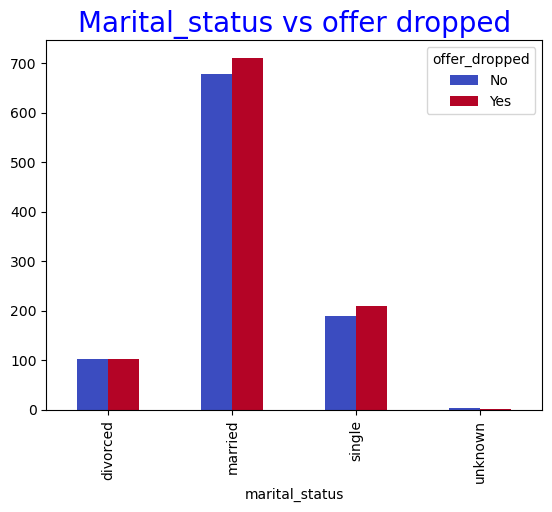

In [35]:
MO.plot(kind='bar', cmap ='coolwarm')
plt.title('Marital_status vs offer dropped', fontdict= {'fontsize':20, 'fontweight':5, 'color':'blue'})

In [36]:
EO=pd.crosstab(data['education_level'],data['offer_dropped'])
EO

offer_dropped,No,Yes
education_level,,
Associate Certification,289,301
Associate Degree,316,308
Bachelor Degree,221,248
Master Degree,149,167


Text(0.5, 1.0, 'Educational vs offer dropped')

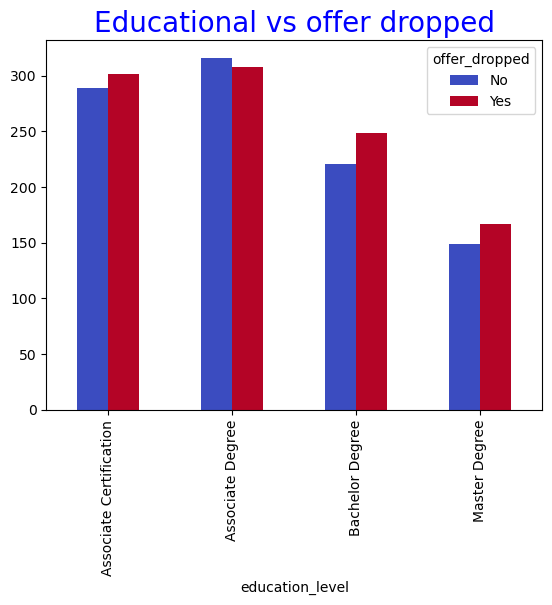

In [37]:
EO.plot(kind='bar', cmap ='coolwarm')
plt.title('Educational vs offer dropped', fontdict= {'fontsize':20, 'fontweight':5, 'color':'blue'})

## Testing

Chi Square Analysis

**Test1**\
**Test whether there is significant relationship between marital status and offer dropping**\
Ho: No Relatipnship between variables

H1: There is Relationship between variables

In [38]:
MO

offer_dropped,No,Yes
marital_status,,
divorced,103,102
married,678,711
single,190,210
unknown,4,1


### while if there any small values in the contigency table we need to convert it into any of the other, unknown can be changed to married or divorced

Text(0.5, 1.0, 'Marital Status and Offer dropped\n')

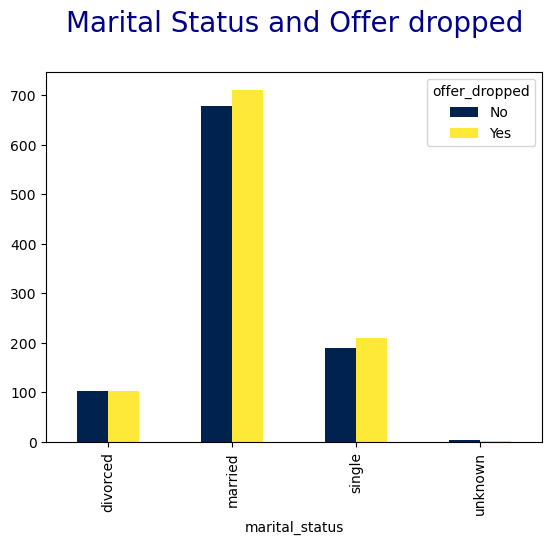

In [39]:
MO.plot(kind='bar', cmap ='cividis')
plt.title('Marital Status and Offer dropped\n', fontdict= {'fontsize':20, 'fontweight':5, 'color':'darkblue'})

In [40]:
import  scipy.stats as stats
from scipy.stats import chi2
alpha=0.05
values1=stats.chi2_contingency(MO)
values1

(2.389230347851195,
 0.49564253863529995,
 3,
 array([[ 99.98749375, 105.01250625],
        [677.47623812, 711.52376188],
        [195.09754877, 204.90245123],
        [  2.43871936,   2.56128064]]))

In [41]:
p_value1=values1[1]
p_value1

0.49564253863529995

In [42]:
if p_value1 <= alpha:
   print("Reject H0")
else:
  print("Accept H0")

Accept H0


### Since there is no relationship between Marital status and offer dropped we can delete marital status variables.
so, if any varible is not related and there is no relationship between the offer dreopped we can remove those variables

Test2
Test whether there is significant relationship between Sourcing Channel and offer dropping
Ho: No Relatipnship between variables

H1: There is Relationship between variables

In [43]:
SO=pd.crosstab(data['sourcing_channel'],data['offer_dropped'])
SO

offer_dropped,No,Yes
sourcing_channel,,
Company Website,204,149
Consultants,194,265
Internal Referrals,85,196
Job Portals,284,202
Social Media,208,212


In [44]:
SO

offer_dropped,No,Yes
sourcing_channel,,
Company Website,204,149
Consultants,194,265
Internal Referrals,85,196
Job Portals,284,202
Social Media,208,212


Text(0.5, 1.0, 'Sourcing Channel and Offer dropped\n')

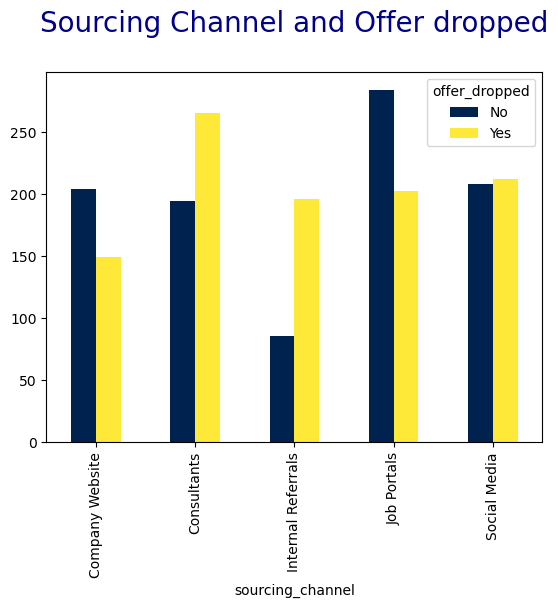

In [45]:
SO.plot(kind='bar', cmap ='cividis')
plt.title('Sourcing Channel and Offer dropped\n', fontdict= {'fontsize':20, 'fontweight':5, 'color':'darkblue'})

In [46]:
alpha=0.05
values2=stats.chi2_contingency(SO)
values2

(76.11707162434504,
 1.156388772239157e-15,
 4,
 array([[172.17358679, 180.82641321],
        [223.87443722, 235.12556278],
        [137.05602801, 143.94397199],
        [237.04352176, 248.95647824],
        [204.85242621, 215.14757379]]))

In [47]:
p_value2=values2[1]
p_value2

1.156388772239157e-15

In [48]:
if p_value2 <= alpha:
   print("Reject H0")
else:
  print("Accept H0")

Reject H0


There is relationship between Sourcing channel and offerdropped, most of the offer dropping happend on consultants an then through social media 

least offer dropping happpens through company website

most of the peoples through job portals doesn't dropped the offer.
